In [1]:
from chebGreen.chebpy2.chebpy.core.algorithms import chebpts2
import matplotlib.pyplot as plt
import numpy as np
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runCustomScript

In [2]:
from chebGreen.chebpy2.chebpy.api import chebfun

In [3]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(trainRatio = 0.95)

In [4]:
F = data.trainDataset[0].numpy()
U = data.trainDataset[1].numpy()

In [5]:
f = F[0,:]
a,b = 0,1
x = np.linspace(a,b,f.shape[0])

In [6]:
def vec2cheb(f, x):
    f = f.reshape((-1))
    x = x.reshape((-1))
    domain = [np.min(x), np.max(x)] # Compute the bounds of the domain
    
    # Function is resampled at twice as many sampled points to maintain accuracy in a different basis.
    N = 2 * f.shape[0] # Check if this is fine
    
    # Compute the Chebyshev nodes and scale them to the domain
    xc = (chebpts2(N) + 1) * ((domain[1] - domain[0])/2) + domain[0]

    # Compute the interpolated value of the function at the Chebyshev nodes
    fc = np.interp(xc, x, f).reshape((-1,1))

    return chebfun(fc, domain)

In [7]:
cu = vec2cheb(f,x)

(0.0, 1.0)

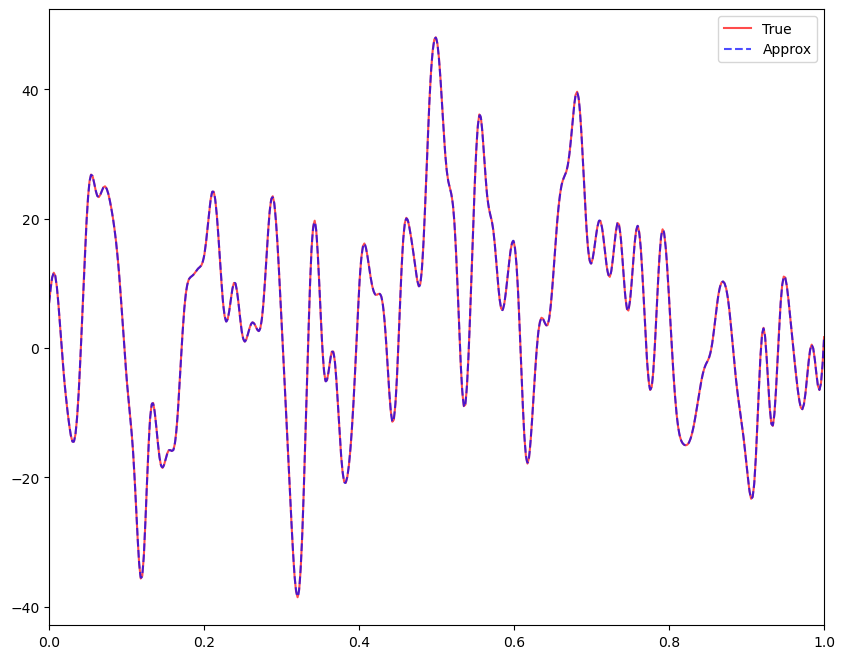

In [9]:
fig = plt.figure(figsize = (10,8))
plt.plot(x,f,'r-',alpha = 0.7)
cu.plot(fig = fig, color = 'blue',linestyle ='--', alpha = 0.7)
plt.legend(['True','Approx'])
plt.xlim([a,b])